<a href="https://colab.research.google.com/github/cminy/cminydev22/blob/main/djhc_bch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DESCRIPTION : 4장 연습문제
# -*- coding: utf-8 -*-


import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from math import *
import scipy as sp
import statsmodels.api as sm
import pylab as py

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#1번 (a)(b)(c)

평균:  3.397930490026168   표준편차:  5.68169918216557


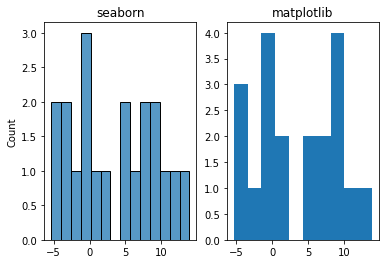

In [ ]:
rand = stats.norm.rvs(loc=3, scale=5, size=20)
rand
print("평균: ", rand.mean(), "  표준편차: ", rand.std())
plt.subplot(121)
sns.histplot(rand, bins=14)
plt.title("seaborn")
# -plt와 비교
plt.subplot(122)
plt.hist(rand)
plt.title("matplotlib")
plt.show()

#2번 (a)(b)(c)

In [ ]:
rand_p = stats.poisson.rvs(mu=3, size=10)
rand_p

array([0, 3, 3, 1, 6, 4, 6, 4, 3, 2])

평균:  3.2   표준편차:  1.8330302779823362


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


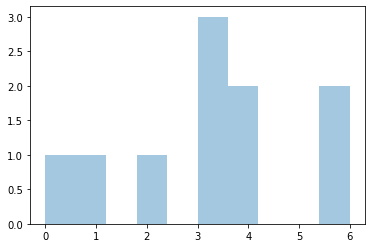

In [ ]:
print("평균: ", rand_p.mean(), "  표준편차: ", rand_p.std())
sns.distplot(rand_p, bins=10, hist=True, kde=False, rug=False)

#3번 (a)

In [ ]:
a = stats.norm.ppf(loc=10, scale=3, q=0.6)
a

10.760041309407399

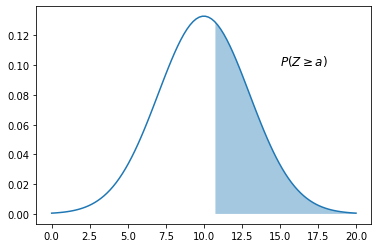

In [ ]:
# - 그래프 그려보기
x = np.linspace(0, 20, 100)
y = stats.norm.pdf(x, 10, 3)
colored = np.linspace(a, 20, 100)
y2 = stats.norm.pdf(colored, 10, 3)
plt.plot(x, y)
plt.fill_between(colored, y2, alpha=0.4)
plt.text(15, 0.1, '$P(Z{\geq}a)$', fontsize=12)
plt.show()

# 3번 (b)(c)

In [ ]:
# -가우시안함수로 함수만들어서 적분으로 구해보기

def N(x, u, s2) -> (float):
    p = 1 / sqrt(2 * pi * s2) * exp(-pow(x - u, 2) / (2 * s2))
    return p


def f(x):
    return N(x, 10, pow(3, 2))


p1 = sp.integrate.quad(f, 12, np.inf)
print(p1[0])

p2 = sp.integrate.quad(f, 11.5, np.inf)
print(1 - p2[0])

0.2524925375469229
0.6914624612740132


#4번 (a)(b)(c)

In [ ]:
stats.norm.ppf(loc=0, scale=1, q=0.95)

1.6448536269514722

In [ ]:
stats.norm.ppf(loc=0, scale=1, q=1 - (1 - 0.95) / 2)

1.959963984540054

#5번

In [ ]:
# - 6이 한번이나 두번 나오는 경우 제외
1 - stats.binom.cdf(2, 5, 1 / 6)

0.03549382716049376

#6번

In [ ]:
p = 1 / 2
n = 10000
k1 = 4979
k2 = 5020

stats.binom.cdf(k2, n, p) - stats.binom.cdf(k1, n, p)

0.3181919670623352

# 7번 (a)(b)(c)(d)(e)(f)

In [ ]:
df = 10
stats.t.sf(2.5, df)

0.015723422118304388

In [ ]:
stats.t.cdf(-2.5, df)

0.015723422118304388

In [ ]:
# -sf이용하는 경우
1 - stats.t.sf(-2.5, df)

0.015723422118304353

In [ ]:
stats.t.sf(1.8, df) * 2

0.10205224313467903

In [ ]:
stats.t.sf(2.5, df)

0.015723422118304388

In [ ]:
stats.t.cdf(-2.5, df)

0.015723422118304388

In [ ]:
stats.t.cdf(1.5, df) - stats.t.cdf(-1, df)

0.7472997706262499

#8번 (a)(b)(c)(d)

In [ ]:
mu = 3
stats.poisson.sf(2, mu)

0.5768099188731566

In [ ]:
stats.poisson.cdf(3, mu)

0.6472318887822313

In [ ]:
stats.poisson.cdf(7, mu) - stats.poisson.cdf(1, mu)

0.7889472226721868

In [ ]:
# - 생존함수로 구하려면
stats.poisson.sf(1, mu) - stats.poisson.sf(7, mu)

0.7889472226721868

In [ ]:
stats.poisson.cdf(3, mu)

0.6472318887822313

# 9번 (a)(b)(c)(d)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


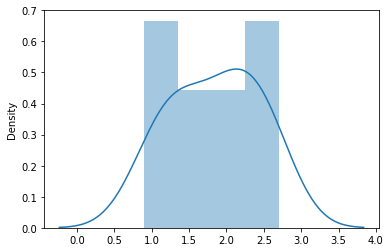

In [ ]:
arr = np.array([1.5, 2.2, 0.9, 1.3, 2.0, 1.2, 2.5, 2.7, 1.8, 2.3])
# - seaborn 이용
sns.distplot(arr, bins=4)

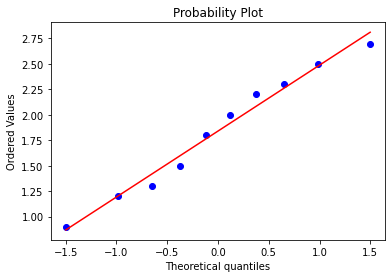

In [ ]:
# - scipy 이용
stats.probplot(arr, dist=stats.norm, plot=plt)
plt.show()

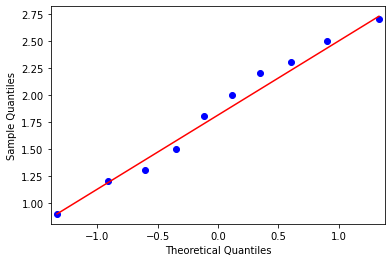

In [ ]:
# - statsmodels 이용 >>> y=x 일치하지 않아서 정규분포라고 할 수 없음
sm.qqplot(arr, line='q', dist=stats.norm)
plt.show()

In [ ]:
# - shapiro 이용 >>> W가 0.9643이고 pvalue가 0.8336임으로 유의수준 5%에서 H0기각할 수 없음 >> 정규성 갖는다
stats.shapiro(arr)

(0.9642988443374634, 0.8335505723953247)

In [ ]:
print("평균: ", arr.mean(), "//분산: ", arr.var(), "//표준편차: ", arr.std())

평균:  1.8400000000000003 //분산:  0.32439999999999997 //표준편차:  0.5695612346359257


#10번


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


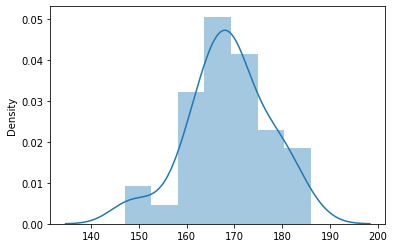

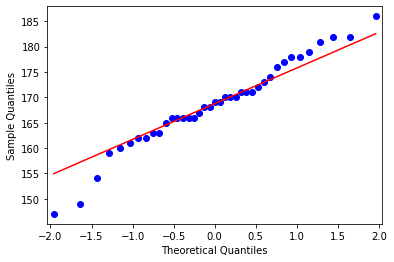

In [ ]:
arr2 = np.array([182, 167, 166, 159, 178, 176, 169, 163, 166, 181, 171, 182, 172, 186, 171, 166, 170, 168,
                 154, 173, 174, 166, 160, 162, 161, 179, 147, 162, 170, 166, 165, 178, 171, 169, 149, 168, 177, 170, 163])
pd.DataFrame(arr2).describe()
sns.distplot(arr2)
sm.qqplot(arr2, line='q', dist=stats.norm)
plt.show()

In [ ]:
# - shapiro >>>  유의수준 5%에서 정규분포 따른다고 할 수 있음
stats.shapiro(arr2)

(0.9753990769386292, 0.5396954417228699)

#12번

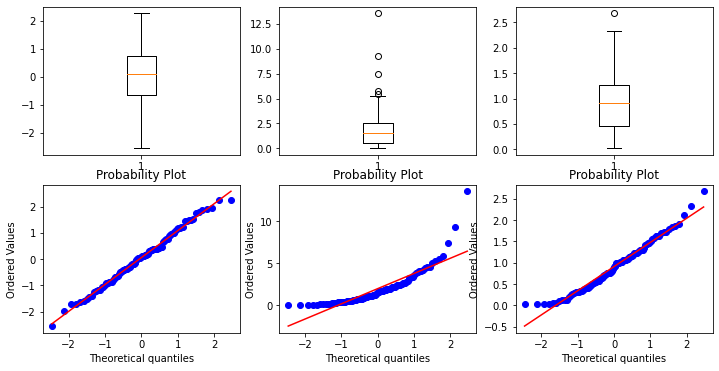

In [ ]:
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.exponential(2, 100)
x3 = np.log1p(x2)
f, axes = plt.subplots(2, 3, figsize=(12, 6))
# - 상자그림
axes[0][0].boxplot(x1)
axes[0][1].boxplot(x2)
axes[0][2].boxplot(x3)
# - qqplot
stats.probplot(x1, plot=axes[1][0])
stats.probplot(x2, plot=axes[1][1])
stats.probplot(x3, plot=axes[1][2])
plt.show()